<a href="https://colab.research.google.com/github/sachinchauhari479/Object-detection-using-deep-learning/blob/main/McDonalds_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns 

#clustering model library
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import os

In [2]:
data_frame = pd.read_csv('https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv')


In [3]:
data_frame.to_csv('data_frame.csv')

In [4]:
data_frame

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [5]:
data_frame.yummy.unique()

array(['No', 'Yes'], dtype=object)

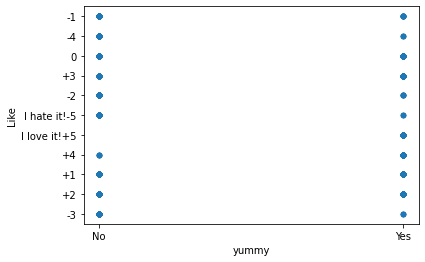

In [6]:
data_frame.plot.scatter(x='yummy',y='Like')

In [7]:
data_frame.yummy.value_counts()

Yes    803
No     650
Name: yummy, dtype: int64

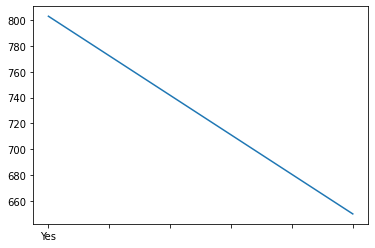

In [8]:
data_frame.yummy.value_counts().plot()

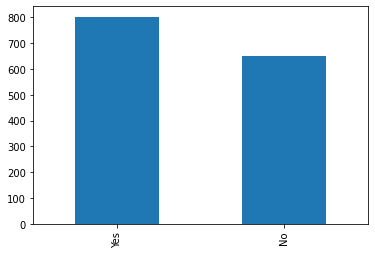

In [9]:
data_frame.yummy.value_counts().plot(kind='bar')

In [10]:
data_frame.convenient.unique()


array(['Yes', 'No'], dtype=object)

In [11]:
data_frame.convenient.value_counts()

Yes    1319
No      134
Name: convenient, dtype: int64

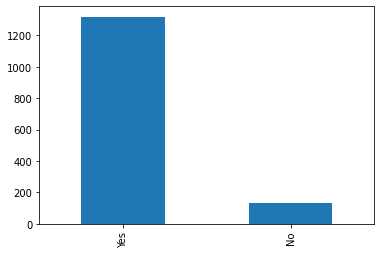

In [12]:
data_frame.convenient.value_counts().plot(kind='bar')

In [13]:
data_frame.spicy.unique()


array(['No', 'Yes'], dtype=object)

In [14]:
data_frame.spicy.value_counts()

No     1317
Yes     136
Name: spicy, dtype: int64

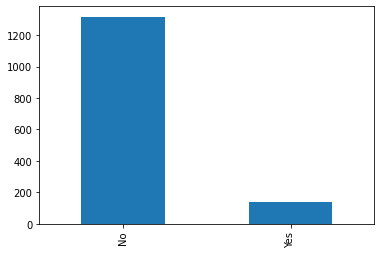

In [15]:
data_frame.spicy.value_counts().plot(kind='bar')

In [16]:
data_frame.fattening.unique()


array(['Yes', 'No'], dtype=object)

In [17]:
data_frame.fattening.value_counts()

Yes    1260
No      193
Name: fattening, dtype: int64

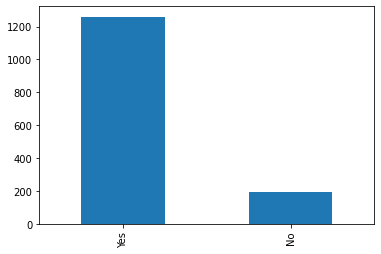

In [18]:
data_frame.fattening.value_counts().plot(kind='bar')

In [19]:
data_frame.greasy.unique()


array(['No', 'Yes'], dtype=object)

In [20]:
data_frame.greasy.value_counts()

Yes    765
No     688
Name: greasy, dtype: int64

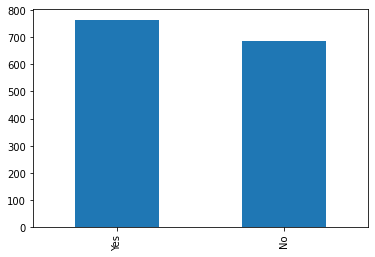

In [21]:
data_frame.greasy.value_counts().plot(kind='bar')

In [22]:
data_frame.fast.unique()


array(['Yes', 'No'], dtype=object)

In [23]:
data_frame.fast.value_counts()

Yes    1308
No      145
Name: fast, dtype: int64

In [24]:
data_frame.cheap.unique()


array(['Yes', 'No'], dtype=object)

In [25]:
data_frame.cheap.value_counts()

Yes    870
No     583
Name: cheap, dtype: int64

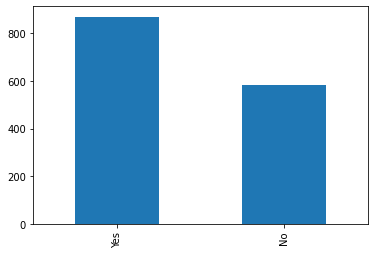

In [26]:
data_frame.cheap.value_counts().plot(kind='bar')

In [27]:
data_frame.tasty.unique()


array(['No', 'Yes'], dtype=object)

In [28]:
data_frame.tasty.value_counts()

Yes    936
No     517
Name: tasty, dtype: int64

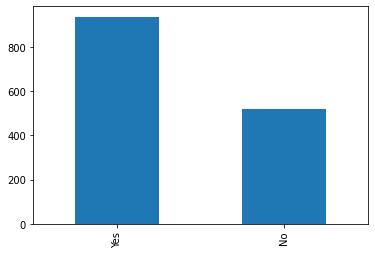

In [29]:
data_frame.tasty.value_counts().plot(kind='bar')

In [30]:
data_frame.expensive.unique()


array(['Yes', 'No'], dtype=object)

In [31]:
data_frame.expensive.value_counts()

No     933
Yes    520
Name: expensive, dtype: int64

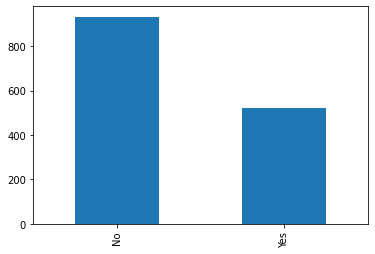

In [32]:
data_frame.expensive.value_counts().plot(kind='bar')

In [33]:
data_frame.healthy.unique()


array(['No', 'Yes'], dtype=object)

In [34]:
data_frame.healthy.value_counts()

No     1164
Yes     289
Name: healthy, dtype: int64

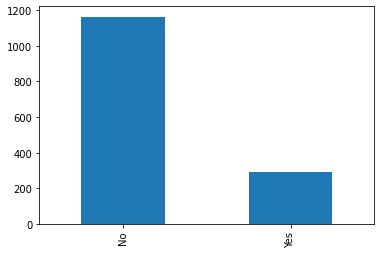

In [35]:
data_frame.healthy.value_counts().plot(kind='bar')

In [36]:
data_frame.disgusting.unique()


array(['No', 'Yes'], dtype=object)

In [37]:
data_frame.disgusting.value_counts()

No     1100
Yes     353
Name: disgusting, dtype: int64

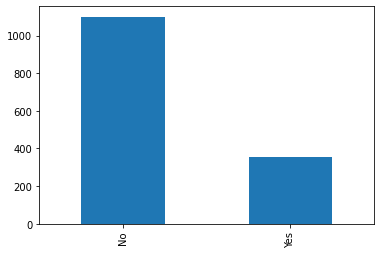

In [38]:
data_frame.disgusting.value_counts().plot(kind='bar')

In [39]:
data_frame.Like.unique()


array(['-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3',
       '0', '-4', '-1'], dtype=object)

In [40]:
data_frame.Like.value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

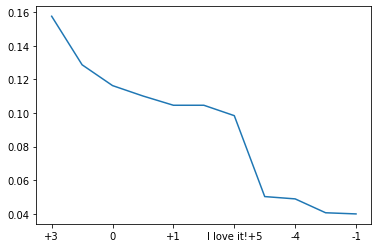

In [41]:
data_frame.Like.value_counts(normalize=True).plot()

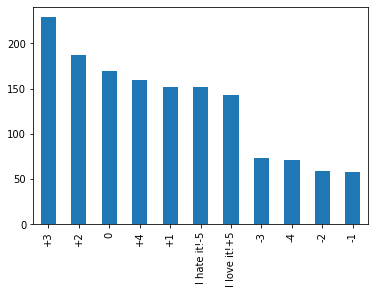

In [42]:
data_frame.Like.value_counts().plot(kind='bar')

In [43]:
data_frame.Age.unique()


array([61, 51, 62, 69, 49, 55, 56, 23, 58, 32, 53, 28, 65, 54, 67, 34, 31,
       47, 37, 41, 36, 50, 39, 35, 20, 24, 44, 40, 48, 38, 57, 60, 66, 42,
       26, 52, 29, 25, 22, 45, 18, 68, 43, 21, 27, 33, 63, 46, 59, 19, 64,
       70, 30, 71])

In [44]:
data_frame.Age.value_counts()

55    53
60    38
37    37
59    36
57    36
52    36
58    35
36    35
49    34
62    34
50    34
32    33
44    32
56    32
64    32
53    31
26    31
24    30
35    30
51    30
47    30
42    30
23    30
39    29
29    28
34    28
30    28
38    27
40    27
31    27
25    26
33    26
61    26
67    26
48    26
43    25
27    25
63    25
54    24
41    23
22    23
65    23
45    22
20    21
46    19
28    18
66    17
21    16
18    16
70    15
69    14
68    13
19    10
71     1
Name: Age, dtype: int64

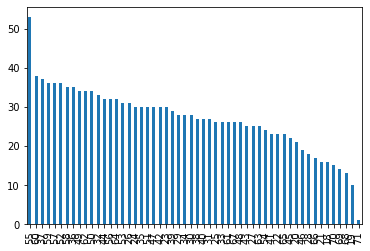

In [45]:
data_frame.Age.value_counts().plot(kind='bar')

In [46]:
data_frame.Gender.unique()


array(['Female', 'Male'], dtype=object)

In [47]:
data_frame.Gender.value_counts()

Female    788
Male      665
Name: Gender, dtype: int64

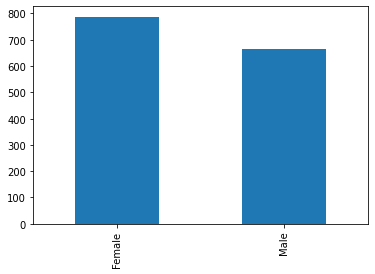

In [48]:
data_frame.Gender.value_counts().plot(kind='bar')

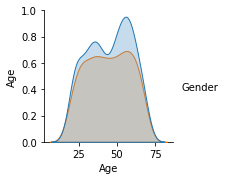

In [49]:
sns.pairplot(data=data_frame,hue='Gender')

In [61]:
from sklearn.preprocessing import LabelEncoder
def labelling(x):
    data_frame[x] = LabelEncoder().fit_transform(data_frame[x])
    return data_frame

column = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in column:
    labelling(i)

In [62]:
data_frame

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [63]:
data_11=data_frame.loc[:,column]


In [64]:
data_11

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [67]:
#convert all column value in singe array for Perform PCA
x=data_11.loc[:,column].values

In [68]:
x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [79]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
pc = pca.fit_transform(x)

In [82]:
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
p = pd.DataFrame(data = pc, columns = names)

In [83]:
p

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [84]:
#VARIANCE OF ALL COLUMNS
pca.explained_variance_ratio_ 

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [88]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = data_11.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


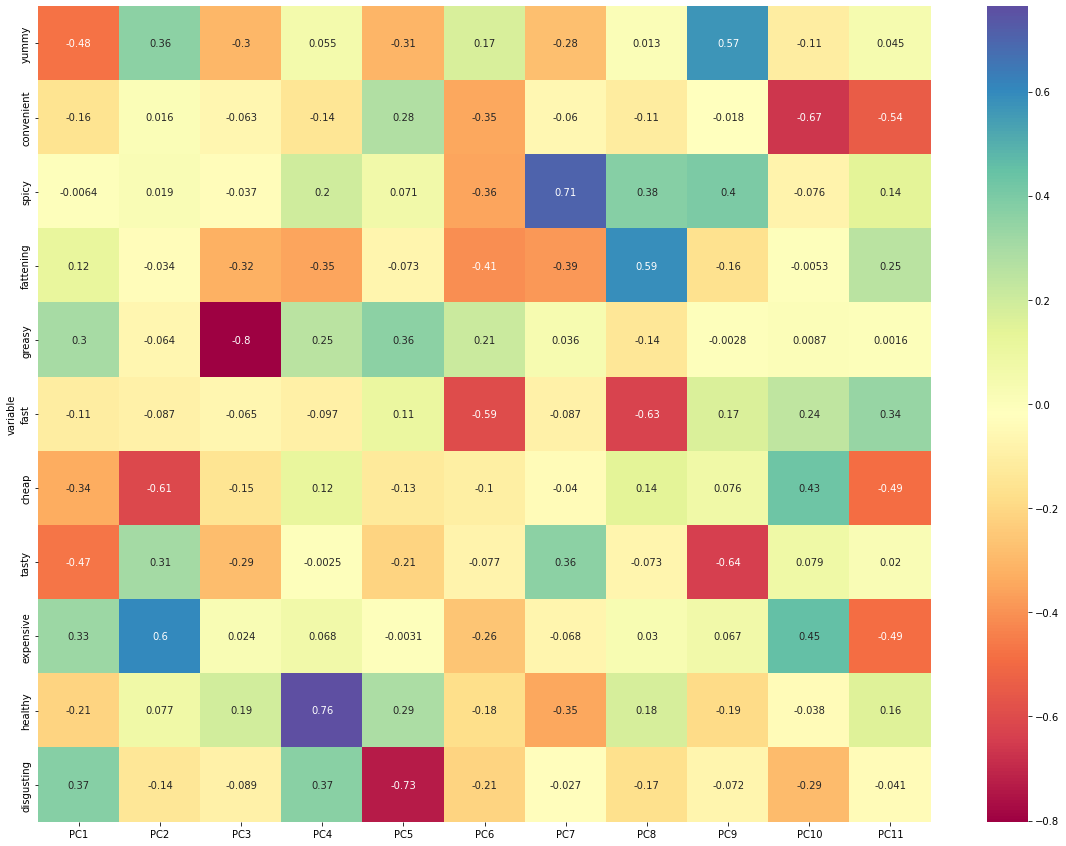

In [89]:
#Correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

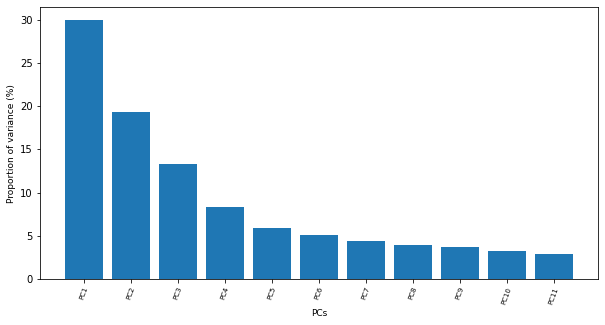

In [90]:
#Screen plot (Elbow test)- PCA
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))

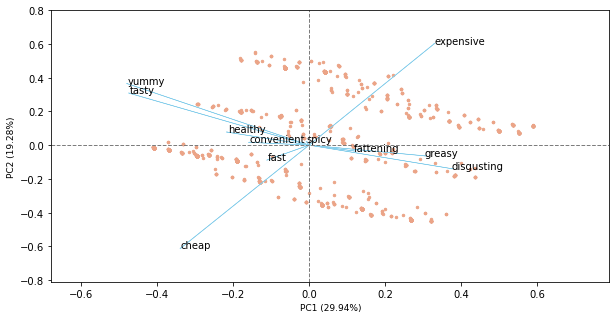

In [92]:
# get PC scores
pca_scores = PCA().fit_transform(x)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=data_frame.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

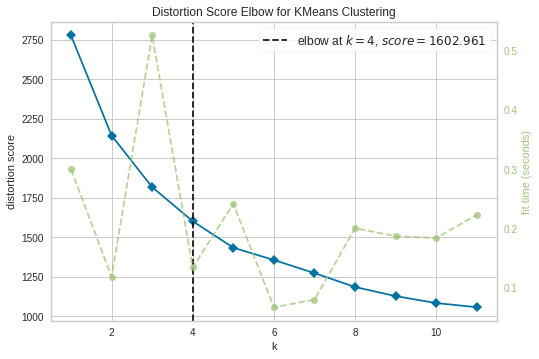

In [94]:
#Extracting segments

#Using k-means clustering analysis
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(data_11)
visualizer.show()

In [104]:
column2=['Like','Age','VisitFrequency','Gender']

In [105]:
data=data_frame.loc[:,column2]


In [106]:
#K-means clustering 

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(data_11)
data['segment_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

[3 2 2 ... 2 1 0]
1603.0604440558923
4
[[2.03252033e-02 6.82926829e-01 8.53658537e-02 9.14634146e-01
  6.95121951e-01 7.31707317e-01 6.50406504e-02 8.94308943e-02
  8.78048780e-01 6.09756098e-02 7.15447154e-01 3.00000000e+00]
 [8.87931034e-01 9.81034483e-01 8.62068966e-02 7.94827586e-01
  3.29310345e-01 9.60344828e-01 9.22413793e-01 9.75862069e-01
  1.72413793e-02 3.20689655e-01 4.31034483e-02 1.00000000e+00]
 [8.54489164e-01 9.62848297e-01 1.33126935e-01 9.07120743e-01
  6.19195046e-01 8.60681115e-01 1.08359133e-01 9.31888545e-01
  8.97832817e-01 2.04334365e-01 1.05263158e-01 1.55431223e-15]
 [2.30263158e-02 8.91447368e-01 7.23684211e-02 9.24342105e-01
  6.67763158e-01 9.63815789e-01 9.34210526e-01 1.54605263e-01
  1.31578947e-02 7.23684211e-02 3.88157895e-01 2.00000000e+00]]


In [107]:
#To see each cluster size
from collections import Counter
Counter(kmeans.labels_)

Counter({3: 304, 2: 323, 1: 580, 0: 246})

In [108]:
data

,Like,Age,VisitFrequency,Gender,segment_num
0,-3,61,Every three months,Female,3
1,+2,51,Every three months,Female,2
2,+1,62,Every three months,Female,2
3,+4,69,Once a week,Female,1
4,+2,49,Once a month,Male,3
...,...,...,...,...,...
1448,I hate it!-5,47,Once a year,Male,0
1449,+2,36,Once a week,Female,1
1450,+3,52,Once a month,Female,2
1451,+4,41,Every three months,Male,1


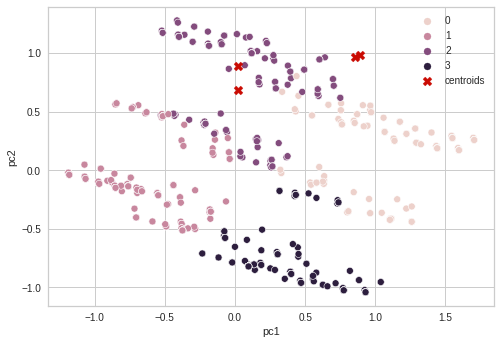

In [110]:
#Visulazing clusters
sns.scatterplot(data=p, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [114]:
#Mosaic plot gender vs segment
crosstab_gender =pd.crosstab(data['segment_num'],data['Gender'])
crosstab_gender

Gender,Female,Male
segment_num,,
0,106,140
1,349,231
2,154,169
3,179,125


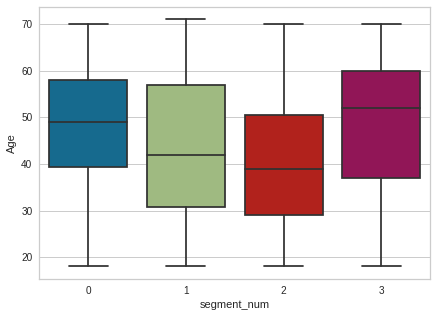

In [116]:

#box plot for age

sns.boxplot(x="segment_num", y="Age", data=data)

In [119]:
#Calculating the mean
#Visit frequency
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
visit = data.groupby('segment_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,segment_num,VisitFrequency
0,0,2.654472
1,1,2.584483
2,2,2.547988
3,3,2.822368


In [120]:
#Like
data['Like'] = LabelEncoder().fit_transform(data['Like'])
Like = data.groupby('segment_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,segment_num,Like
0,0,6.739837
1,1,3.794828
2,2,3.798762
3,3,5.430921


In [121]:
#Gender
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
Gender = data.groupby('segment_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,segment_num,Gender
0,0,0.569106
1,1,0.398276
2,2,0.523220
3,3,0.411184


In [122]:
segment = Gender.merge(Like, on='segment_num', how='left').merge(visit, on='segment_num', how='left')
segment

,segment_num,Gender,Like,VisitFrequency
0,0,0.569106,6.739837,2.654472
1,1,0.398276,3.794828,2.584483
2,2,0.523220,3.798762,2.547988
3,3,0.411184,5.430921,2.822368


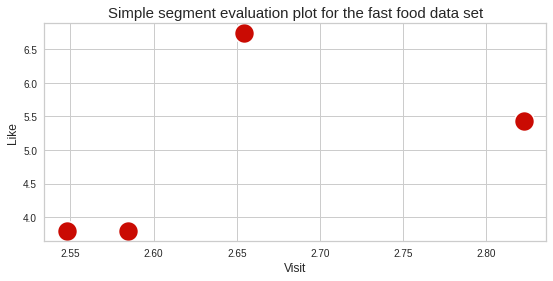

In [123]:
#Target segments

plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()